In [1]:
#kerasの必要なコンポーネントをインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
#SequentialとDenseのimportの仕方は統一しないとエラーが出る

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_mldata

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
test_number_image = x_train[100]
# pandasのカラム表示の設定を変更
pd.options.display.max_columns = 28
 
# Numpy配列からPandasのデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)
 
# number_matrixの表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,46,136,136,244,255,241,103,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,15,94,163,253,253,253,253,238,218,204,35,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,131,253,253,253,253,237,200,57,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,155,246,253,247,108,65,45,0,0,0,0,0,0,0,0,0,0,0


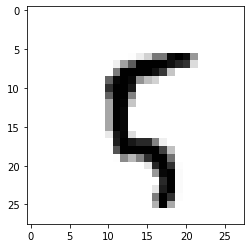

In [6]:
#imshowを使ってtest_number_imageを画像で表示
%matplotlib inline

plt.imshow(test_number_image, cmap = matplotlib.cm.binary,
           interpolation='nearest')
plt.show()

In [20]:
# 28x28x1のサイズへ変換しましょう
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [21]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [22]:
# 正規化（ピクセルの最大値は255）
x_train /= 255
x_test /= 255

In [23]:
# ターゲットとなるyを変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
 
# y_testの1を表示
y_test[1]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
model = Sequential()

In [25]:
# 先に作成したmodelへレイヤーを追加
model.add(Conv2D(32, kernel_size=(3, 3),#二次元畳み込み層．空間フィルター畳み込み演算層
                 activation='relu',     #活性化関数の定義
                 input_shape=(28,28,1)))#白黒画像を入力
model.add(MaxPooling2D(pool_size=(2, 2)))#最大プーリング層を定義
model.add(Conv2D(128, kernel_size=(3,3), 
                 activation="relu"))#
model.add(MaxPooling2D(pool_size=(2, 2)))#最大プーリング層を定義
model.add(Dropout(0.25))#Dropoutの割合定義（過学習の予防）
model.add(Flatten())#平坦化（次元削減）1次元ベクトルに変換する
model.add(Dense(128, activation='relu'))#全結合層．出力128を定義
model.add(Dense(10, activation='softmax'))#出力が確率になるように変換

In [26]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy',#ラベル付けの損失関数
optimizer='sgd',#確率的勾配降下法
metrics=['accuracy'])


In [27]:
# 注意 - 10〜15分程度かかります
# モデルの訓練（エポック １０）
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.5134 - accuracy: 0.8475
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1442 - accuracy: 0.9559
Epoch 3/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1047 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0751 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0667 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0599 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0548 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0520 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 87s 

In [28]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(loss_and_metrics)

79/79 [==============================] - 3s 34ms/step - loss: 0.0356 - accuracy: 0.9883
[0.03562743216753006, 0.9883000254631042]
